<a href="https://colab.research.google.com/github/AliTarek-1/Deep-Learning-Project/blob/main/Project_DeepLearning_Mobile_%26_Laptops_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
from sklearn.metrics import mean_squared_error, r2_score

#**LOAD DATA**

In [ ]:
df = pd.read_csv("/content/mobile_sales_data.csv")
df

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,NaN,Snapdragon 7s,12GB,1TB,NaN


# **DESCRIBE DATA**

In [ ]:
df.shape


(50000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

In [ ]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,0
Dispatch Date,0
Quantity Sold,0
Customer Name,0
Customer Location,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='all')

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
count,50000,50000,50000,50000,50000.000000,50000,50000,50000.00000,50000,50000,50000,25017,50000,50000,50000,25017
unique,2,20,50000,50000,NaN,731,788,NaN,40013,25147,5,8,15,6,5,4
top,Laptop,Google,6292A134,Science father term serve out course from resp...,NaN,2024-10-26,2024-09-05,NaN,Robert Smith,South Michael,West,i5,MediaTek Dimensity,4GB,256GB,256GB
freq,25017,2598,1,1,NaN,100,90,NaN,22,54,10288,3215,3640,8417,10127,6301
mean,NaN,NaN,NaN,NaN,102641.407080,NaN,NaN,5.51378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,56363.550361,NaN,NaN,2.88101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5008.000000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,53487.000000,NaN,NaN,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,103072.000000,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,151396.250000,NaN,NaN,8.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [ ]:
df.tail()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,NaN,Snapdragon 7s,12GB,1TB,NaN
49999,Laptop,Asus,9C3FC57C,Role ahead common listen idea few blood half.,86483,2023-08-29,2023-10-26,7,Robert Sampson,West Elizabethchester,East,i7,i7,12GB,128GB,256GB


In [ ]:
df.sample(5)

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
3517,Laptop,Google,46503600,Six control wait sit hair but stage price.,38518,2023-06-01,2023-06-15,4,Carla Vega,Randallstad,North,i7,i7,32GB,512GB,512GB
21447,Mobile Phone,Samsung,A282138A,Claim use treat least career oil.,90647,2024-09-21,2024-10-10,9,William Campbell,North Lisatown,West,NaN,Apple A-Series,8GB,1TB,NaN
44935,Mobile Phone,iQOO,65B6B256,Everyone decide feel agreement lot side far pi...,19320,2023-07-08,2023-08-27,1,Shawn Jackson,Chapmanbury,South,NaN,Snapdragon 7 Gen,4GB,256GB,NaN
43067,Laptop,Samsung,803D3460,Put assume simple standard bank crime do up pr...,164195,2024-02-20,2024-03-25,3,Daniel Pratt,Jessicamouth,East,i5,i5,8GB,1TB,2TB
3569,Mobile Phone,Asus,99740BB7,Partner season summer effect morning tell wide...,178396,2023-05-17,2023-05-27,9,Laura Kent,Birdton,South,NaN,Samsung Exynos,4GB,64GB,NaN


# **DATA CLEANING**

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [ ]:
df['Inward Date'] = pd.to_datetime(df['Inward Date'], errors='coerce')


In [ ]:
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'], errors='coerce')


In [ ]:
df.drop_duplicates(inplace=True)

# **Fill missing values**

In [ ]:
df['Core Specification'].fillna("N/A(mobile)", inplace=True)


<ipython-input-18-3ba4af455f35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Specification'].fillna("N/A(mobile)", inplace=True)


In [ ]:
df['SSD'].fillna("N/A(mobile)", inplace=True)


<ipython-input-19-2894c6c8b29c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SSD'].fillna("N/A(mobile)", inplace=True)


In [ ]:
df['RAM'].fillna("0GB", inplace=True)


<ipython-input-20-a4abb4723e25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAM'].fillna("0GB", inplace=True)


In [ ]:
df['ROM'].fillna("0GB", inplace=True)

<ipython-input-21-1c26f7d201be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ROM'].fillna("0GB", inplace=True)


In [ ]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,0
Dispatch Date,0
Quantity Sold,0
Customer Name,0
Customer Location,0


# **Rename for clarity**

In [ ]:
df.rename(columns={'Core Specification': 'CPU'}, inplace=True)

# **Add new engineered features**

In [ ]:
df['storage Days'] = (df['Dispatch Date'] - df['Inward Date']).dt.days


In [ ]:
df['Revenue'] = df['Price'] * df['Quantity Sold']

# **VALUE COUNTS (Categorical Columns)**

In [ ]:
 df['Product'].value_counts()


,count
Product,
Laptop,25017
Mobile Phone,24983


In [ ]:
 df['Brand'].value_counts()


,count
Brand,
Google,2598
Nokia,2571
Apple,2564
Samsung,2558
Toshiba,2555
Sony,2547
OnePlus,2541
Acer,2533
Redmi,2529


In [ ]:
 df['CPU'].value_counts()


,count
CPU,
N/A(mobile),24983
i5,3215
Ryzen 3,3176
i9,3146
i3,3143
Ryzen 7,3135
i7,3105
Ryzen 5,3050
Ryzen 9,3047


In [ ]:
 df['RAM'].value_counts()


,count
RAM,
4GB,8417
32GB,8388
16GB,8309
6GB,8304
12GB,8295
8GB,8287


In [ ]:
 df['SSD'].value_counts()

,count
SSD,
N/A(mobile),24983
256GB,6301
2TB,6290
1TB,6255
512GB,6171


# **AGGREGATES (Numeric Columns)**

In [ ]:
df['Price'].agg(['min', 'max', 'mean'])

,Price
min,5008.00000
max,199999.00000
mean,102641.40708


In [ ]:
df['Quantity Sold'].agg(['min', 'max', 'mean'])

,Quantity Sold
min,1.00000
max,10.00000
mean,5.51378


In [ ]:
df['Revenue'].agg(['min', 'max', 'mean'])

,Revenue
min,5.046000e+03
max,1.998850e+06
mean,5.655816e+05


In [ ]:
df['storage Days'].agg(['min', 'max', 'mean'])

,storage Days
min,1.00000
max,60.00000
mean,30.59204


# **FILTER BY SPECIFIC BRAND (Example: Dell)**

In [ ]:
df[df['Brand'].str.contains("Dell", case=False)]

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,CPU,Processor Specification,RAM,ROM,SSD,storage Days,Revenue
6,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6,Nicole Gonzalez,South Miguel,North,N/A(mobile),Apple A-Series,16GB,256GB,N/A(mobile),6,70020
34,Mobile Phone,Dell,BDAB9D30,Thus his however large suddenly analysis recog...,104292,2023-10-28,2023-11-30,8,Gary Williams,Mitchellton,North,N/A(mobile),Snapdragon 8 Gen,32GB,512GB,N/A(mobile),33,834336
74,Mobile Phone,Dell,202F0160,When pattern degree brother oil really one col...,140787,2024-10-14,2024-12-07,10,Elizabeth Martinez,Lake Victoriaborough,West,N/A(mobile),Samsung Exynos,8GB,64GB,N/A(mobile),54,1407870
152,Laptop,Dell,AE9EFC43,Professional street can discuss news evidence ...,65217,2025-02-24,2025-03-19,1,Maria Hopkins,South William,East,Ryzen 3,Ryzen 3,16GB,1TB,512GB,23,65217
191,Laptop,Dell,10621027,Enter vote social play culture per operation e...,186932,2024-02-19,2024-04-19,9,Christine Schwartz,Lake Thomasberg,Central,i9,i9,12GB,1TB,256GB,60,1682388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49903,Laptop,Dell,EE31D764,East his thing kid risk form education boy.,192758,2024-11-22,2024-12-06,3,Andrew Robertson,New Laura,Central,i7,i7,4GB,1TB,2TB,14,578274
49937,Laptop,Dell,85ADE281,Participant call bar boy risk there stop.,190888,2023-08-10,2023-09-19,3,Richard Park,Joycestad,North,Ryzen 9,Ryzen 9,6GB,256GB,2TB,40,572664
49959,Laptop,Dell,E8BA0225,Ask keep region how drop reflect middle impact...,135418,2025-03-14,2025-04-13,9,Clinton Nelson,Lake Donaldport,Central,Ryzen 3,Ryzen 3,16GB,64GB,2TB,30,1218762
49974,Laptop,Dell,634249A8,Later situation become himself cover individua...,131514,2024-05-19,2024-05-31,10,Kenneth Burns,Shawchester,East,i7,i7,12GB,512GB,256GB,12,1315140


# **VISUALIZATION**

In [ ]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")

 #Product Count Plot

<ipython-input-44-cdcbd50b5457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', palette=custom_palette)
<ipython-input-44-cdcbd50b5457>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Product', palette=custom_palette)
<ipython-input-44-cdcbd50b5457>:6: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


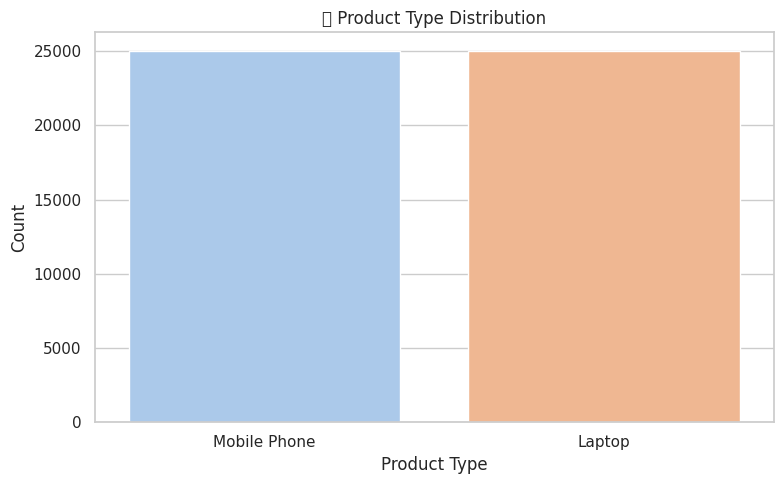

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', palette=custom_palette)
plt.title("🛍️ Product Type Distribution")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Brand Distribution Plot

<ipython-input-45-e09013b4072a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', palette='Set2')
<ipython-input-45-e09013b4072a>:6: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


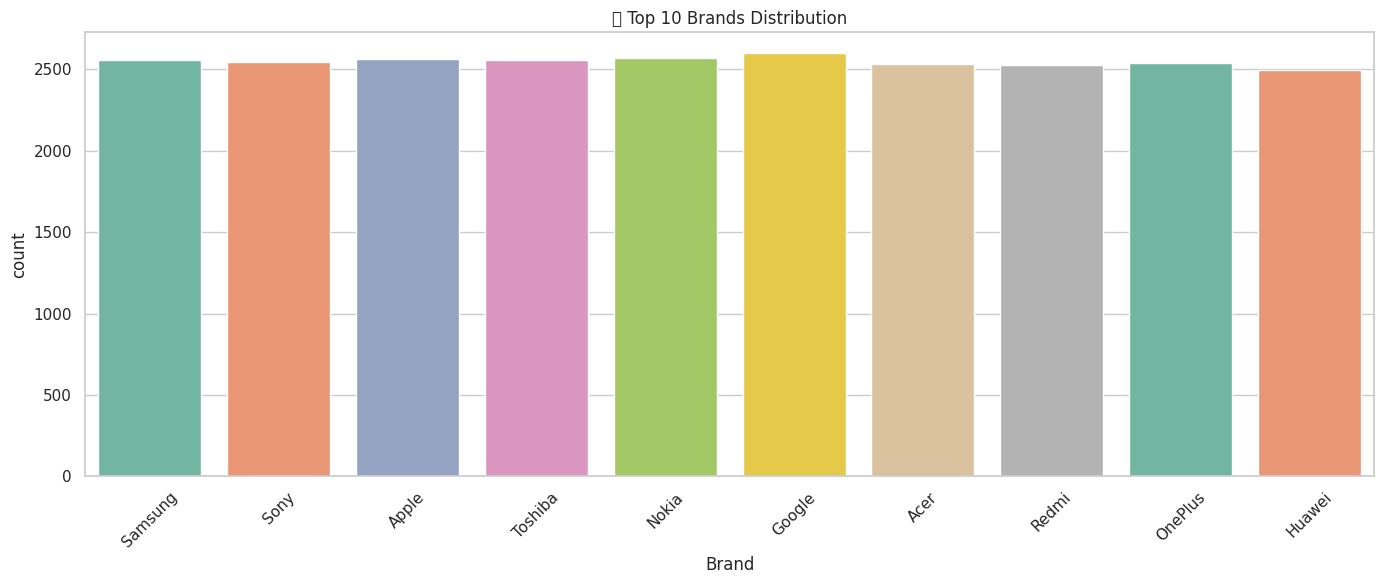

In [ ]:
plt.figure(figsize=(14, 6))
top_brands = df['Brand'].value_counts().index[:10]
sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', palette='Set2')
plt.title("🏷️ Top 10 Brands Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price vs Quantity Sold

<ipython-input-46-076276821c0b>:4: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


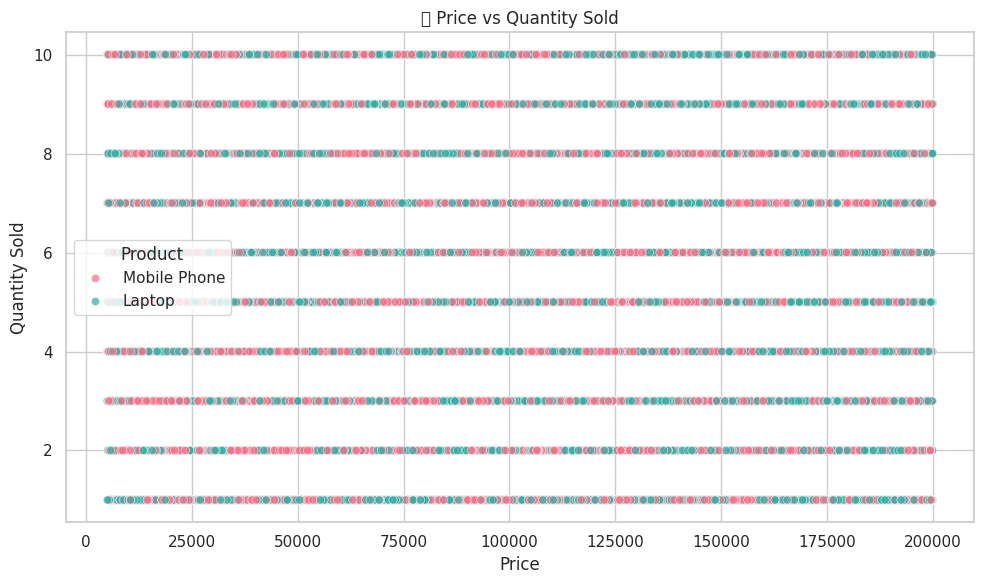

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Quantity Sold', hue='Product', palette='husl', alpha=0.7)
plt.title("💸 Price vs Quantity Sold")
plt.tight_layout()
plt.show()

<ipython-input-47-20947145063d>:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


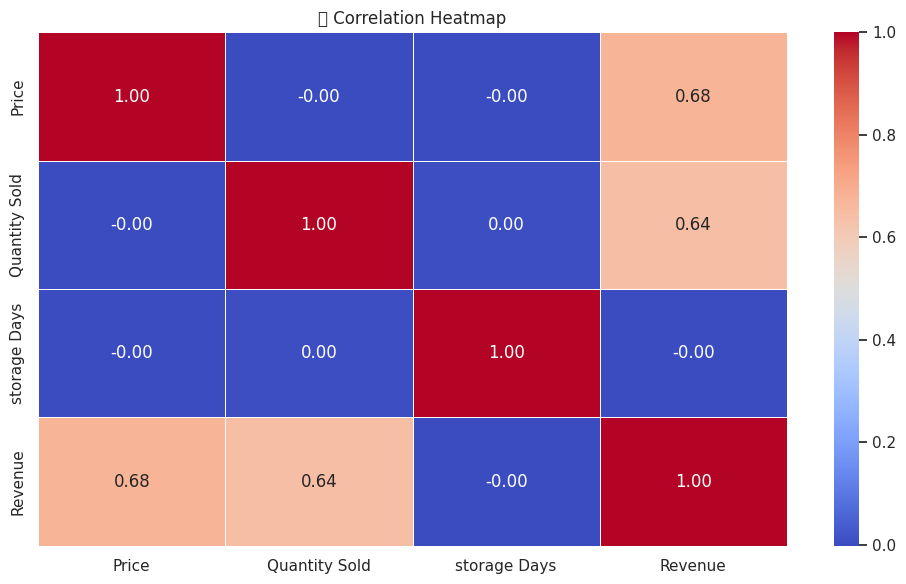

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['Price', 'Quantity Sold', 'storage Days', 'Revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Heatmap")
plt.tight_layout()
plt.show()

# Correlation

In [ ]:
 df[['Price', 'Quantity Sold', 'storage Days', 'Revenue']].corr()

,Price,Quantity Sold,storage Days,Revenue
Price,1.000000,-0.002220,-0.001634,0.677163
Quantity Sold,-0.002220,1.000000,0.001835,0.643921
storage Days,-0.001634,0.001835,1.000000,-0.001458
Revenue,0.677163,0.643921,-0.001458,1.000000


# **FEATURE SELECTION FOR MODELING**

In [ ]:
df_model = df.drop(columns=[
    'Product Code', 'Product Specification', 'Customer Name',
    'Customer Location', 'Inward Date', 'Dispatch Date'
])

# **ENCODING CATEGORICAL VARIABLES**

In [ ]:
label_encoders = {}
for col in ['Product', 'Brand', 'Region', 'CPU', 'Processor Specification', 'RAM', 'ROM', 'SSD']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# **TRAIN-TEST SPLIT & STANDARDIZATION**

In [ ]:
X = df_model.drop(columns=['Quantity Sold'])
y = df_model['Quantity Sold']




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Training set:", X_train_scaled.shape)
print("Test set:", X_test_scaled.shape)

Training set: (40000, 11)
Test set: (10000, 11)


# **Part II: Training a neural network**

**MODEL CREATION FUNCTION**

In [ ]:
def create_model(input_shape, num_layers=2, units_per_layer=64, dropout_rate=0.3,
                 optimizer='adam', learning_rate=0.001, l2_reg=0.01, scheduler=False):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units_per_layer, activation='relu',
                               kernel_regularizer=regularizers.l2(l2_reg)))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1))

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate)

    model.compile(optimizer=opt, loss='mse', metrics=['mae'])

    lr_sched = callbacks.LearningRateScheduler(lambda epoch: learning_rate * 0.95**epoch, verbose=0) if scheduler else None
    return model, lr_sched

**TRAINING FUNCTION**

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=50, lr_schedule=None):
    cb_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    if lr_schedule:
        cb_list.append(lr_schedule)
    return model.fit(X_train, y_train, validation_data=(X_val, y_val),
                     batch_size=batch_size, epochs=epochs, callbacks=cb_list, verbose=1)

**EVALUATION FUNCTION**

In [ ]:
def evaluate_model(model, X, y, dataset_name="Test"):
    preds = model.predict(X).flatten()
    mse = mean_squared_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"📊 {dataset_name} MSE: {mse:.2f}")
    print(f"📈 {dataset_name} R² Score: {r2:.2f}")
    return mse, r2

**HYPERPARAMETERS**

In [ ]:
BASE_CONFIG = {
    "units_per_layer": 128,
    "dropout_rate": 0.3,
    "optimizer": "adam",
    "learning_rate": 0.001,
    "l2_reg": 0.01,
    "batch_size": 64,
    "epochs": 50
}

**MODEL TRAINING AND EVAL**

In [ ]:
model = create_model(
    input_shape=X_train_scaled.shape[1],
    num_layers=BASE_CONFIG["num_layers"],
    units_per_layer=BASE_CONFIG["units_per_layer"],
    dropout_rate=BASE_CONFIG["dropout_rate"],
    optimizer=BASE_CONFIG["optimizer"],
    l2_reg=BASE_CONFIG["l2_reg"],
    learning_rate=BASE_CONFIG["learning_rate"]
)

history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                      batch_size=BASE_CONFIG["batch_size"], epochs=BASE_CONFIG["epochs"])

predictions = evaluate_model(model, X_test_scaled, y_test)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 8.7998 - mae: 1.8560 - val_loss: 1.7120 - val_mae: 0.4762
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1765 - mae: 0.7968 - val_loss: 0.9871 - val_mae: 0.4013
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3621 - mae: 0.6587 - val_loss: 0.6535 - val_mae: 0.3267
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0162 - mae: 0.5898 - val_loss: 0.5880 - val_mae: 0.3646
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8537 - mae: 0.5557 - val_loss: 0.4153 - val_mae: 0.2239
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7786 - mae: 0.5347 - val_loss: 0.3878 - val_mae: 0.2312
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7416 - mae: 0.5225 - val_loss: 0.3534 - val_mae: 0.2089
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7052 - mae: 0.5064 - val_loss: 0.3748 - val_mae: 0.2659
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

**PLOT TRAINING HISTORY**

In [ ]:
def plot_history(history, label='Model'):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label=f'{label} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'{label} - Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title(f'Training Curve - {label}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Vary Number of Layers**

In [ ]:
layers_results = {}
for num_layers in [2, 3, 4]:
    print(f"\n📚 Testing with {num_layers} layers")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=num_layers,
        units_per_layer=BASE_CONFIG["units_per_layer"],
        dropout_rate=BASE_CONFIG["dropout_rate"],
        optimizer=BASE_CONFIG["optimizer"],
        learning_rate=BASE_CONFIG["learning_rate"],
        l2_reg=BASE_CONFIG["l2_reg"],
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=BASE_CONFIG["batch_size"],
                          epochs=BASE_CONFIG["epochs"],
                          lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    layers_results[num_layers] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"{num_layers} Layers")

**Vary Dropout Rate**

In [ ]:
dropout_results = {}
for dr in [0.2, 0.3, 0.5]:
    print(f"\n💧 Testing with Dropout Rate = {dr}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=dr,
        optimizer="adam",
        learning_rate=0.001,
        l2_reg=0.01,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    dropout_results[dr] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"Dropout {dr}")


**Vary L2 Regularization (weight decay)**

In [ ]:
l2_results = {}
for l2 in [0.001, 0.01, 0.1]:
    print(f"\n📏 Testing with L2 Regularization = {l2}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=0.3,
        optimizer="adam",
        learning_rate=0.001,
        l2_reg=l2,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    l2_results[l2] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"L2 = {l2}")


**Vary Learning Rate**

In [ ]:
lr_results = {}
for lr in [0.01, 0.001, 0.0001]:
    print(f"\n📉 Testing with Learning Rate = {lr}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=0.3,
        optimizer="adam",
        learning_rate=lr,
        l2_reg=0.01,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    lr_results[lr] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"LR = {lr}")
